# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БВТ2002 Дубровин Олег
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [ ]:
!pip3 install ColabTurtlePlus
import ColabTurtlePlus.Turtle as turtle
turtle.initializeTurtle()

pen_width = 2 
turtle.hideturtle() 

Put clearscreen() as the first line in a cell (after the import command) to re-run turtle commands in the cell


In [ ]:

class LSystem:
    def __init__(self, t, axiom, width, length, angle):
        self.axiom = axiom
        self.state = axiom
        self.width = width
        self.length = length
        self.angle = angle
        self.t = t
        self.rules = {} 
        self.t.pensize = self.width

    def draw_turtle(self, start_pos, start_angle):
   
        turtle.speed(13)
        self.t.up()                
        self.t.setpos(start_pos)   
        self.t.seth(start_angle)    
        self.t.down()   
        turtle_stack = []            
     
        for move in self.state:
            if move == 'F':
                self.t.forward(self.length)
            elif move == '+':
                self.t.left(self.angle)
            elif move == '-':
                self.t.right(self.angle)
            elif move == "[":
                turtle_stack.append((self.t.xcor(), self.t.ycor(), self.t.heading(), self.t.pensize))
            elif move == "]":
                xcor, ycor, head, w = turtle_stack.pop()
                self.set_turtle((xcor, ycor, head))
                self.width = w
                self.t.pensize = self.width


    def add_rules(self, *rules):
        for key, value in rules:
            self.rules[key] = value

    def generate_path(self, n_iter):
        for n in range(n_iter):
            for key, value in self.rules.items():
                self.state = self.state.replace(key, value.lower())

            self.state = self.state.upper()

    def set_turtle(self, my_tuple):
        self.t.up()
        self.t.goto(my_tuple[0], my_tuple[1])
        self.t.seth(my_tuple[2])
        self.t.down()

In [ ]:
turtle.clear()
  
angle = 60   
axiom = "F"
f_len = 5

l_sys = LSystem(turtle, axiom, pen_width, f_len, angle)
l_sys.add_rules(("F", "F+F--F+F"))
l_sys.generate_path(4)
l_sys.draw_turtle((-300, -100), 0)

In [ ]:
turtle.clear()
angle = 90   
f_len = 6  

axiom = "X"     

l_sys = LSystem(turtle, axiom, pen_width, f_len, angle)
l_sys.add_rules(("X", "-YF+XFX+FY-"), ("Y", "+XF-YFY-FX+"))
l_sys.generate_path(5)
l_sys.draw_turtle( (-100, 0), 0)
turtle.hideturtle()

In [ ]:
turtle.clear()
angle = 90   
f_len = 5   

axiom = "F+XF+F+XF"  

l_sys = LSystem(turtle, axiom, pen_width, f_len, angle)
l_sys.add_rules(("X", "XF-F+F-XF+F+XF-F+F-X"))
l_sys.generate_path(4)
l_sys.draw_turtle( (0, -100), 45)
turtle.hideturtle()

In [ ]:
turtle.clear()
angle = 60     
f_len = 5 

axiom = "FXF--FF--FF"   

l_sys = LSystem(turtle, axiom, pen_width, f_len, angle)
l_sys.add_rules(("F", "FF"), ("X", "--FXF++FXF++FXF--"))
l_sys.generate_path(5)
l_sys.draw_turtle((50, -50), 180)
turtle.hideturtle()

In [ ]:
def s(n, m):
    if n == 0:
        turtle.begin_fill()
        for _ in range(4):
            turtle.forward(m)
            turtle.left(90)
        turtle.end_fill()
    else:
        for _ in range(4):
            s(n - 1, m / 3)
            turtle.forward(m / 3)
 
            s(n - 1, m / 3)
            turtle.forward(m / 3)
 
            turtle.forward(m / 3)
            turtle.left(90)
 
 
turtle.color = ("black")
turtle.speed(13)
turtle.pensize = 2;
turtle.clear()
turtle.setpos((0, 0))
turtle.seth(0)
s(3, 200)

In [ ]:
turtle.clear()
angle = 33 
f_len = 3     
 
axiom = "F[+X][-X]"
l_sys = LSystem(turtle, axiom, pen_width, f_len, angle)
l_sys.add_rules(("F", "FF"), ("X", "F[+F[+X][-X]][-F[+X][-X]]"))
l_sys.generate_path(4)
l_sys.draw_turtle((0, -150), 90)
turtle.hideturtle()

### Вывод
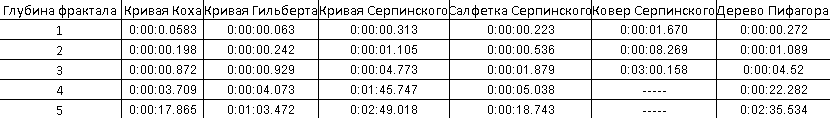